In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpyro.contrib.forecast import Forecaster, GlobalTrendModel, eval_crps, eval_mae, eval_rmse

In [2]:
URL = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/lynx.csv"
lynx = pd.read_csv(URL, index_col=0)
data = lynx["value"].values.astype(float)
print("Length of time series:", data.shape[0])

Length of time series: 114


In [3]:
y_train, y_test = data[:80], data[80:]
model = GlobalTrendModel(seasonality=38, generalized_seasonality=True, level_method="seasAvg")
forecaster = Forecaster(model, y_train)

sample: 100%|██████████| 5000/5000 [00:22<00:00, 224.00it/s, 63 steps of size 5.27e-02. acc. prob=0.90]  



                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend     27.92    100.67     14.38   -107.87    164.89    407.08      1.00
       init_s[0]     90.84    111.21     68.37    -63.39    254.69    769.45      1.00
       init_s[1]    -22.19     68.41    -25.23   -133.00     79.62   1209.41      1.00
       init_s[2]     34.59    104.73     20.95   -103.40    191.34    665.20      1.00
       init_s[3]    127.17    124.38    109.11    -45.87    324.58    664.57      1.00
       init_s[4]    464.07    260.01    418.44     89.89    869.38    863.36      1.00
       init_s[5]   1204.33    515.66   1099.81    496.14   1927.91    421.60      1.02
       init_s[6]   2035.42    689.02   1921.86   1031.75   3109.41    385.13      1.01
       init_s[7]   3744.12   1166.17   3588.59   1861.97   5357.56    326.38      1.02
       init_s[8]   2685.57    859.65   2553.84   1285.73   3968.04    323.18      1.03
       init_s[9]   1173.16   1594.68    89

In [4]:
pred = forecaster(y_train, np.empty((data.shape[0], 0)))
print("MAE: {:.2f}, RMSE: {:.2f}, CPRS: {:.2f}".format(
    eval_mae(pred, y_test), eval_rmse(pred, y_test), eval_crps(pred, y_test)))

MAE: 913.71, RMSE: 1244.97, CPRS: 703.63


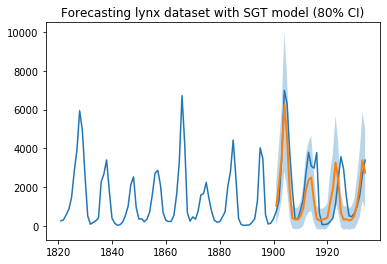

In [5]:
plt.plot(lynx["time"], data)
plt.plot(lynx["time"][80:], np.median(pred, 0), lw=2)
low, high = np.percentile(pred, (5, 95), axis=0)
plt.fill_between(lynx["time"][80:], low, high, alpha=0.3)
plt.title("Forecasting lynx dataset with SGT model (80% CI)");